# SVM Support Vector Machines
### Using Tensorflow / Keras

## Imports

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

## Load data

In [10]:
# Load the data (iris data):  [(Sepal Length, Sepal Width, Petal Length, Petal Width)], Labels = 1/-1 : (setosa, not setosa). Linearly separable.
iris = datasets.load_iris()
X = np.array([[x[0], x[3]] for x in iris.data])
Y = np.array([1 if y==0 else -1 for y in iris.target])

# Split data train/test
trainIdx = np.random.choice(len(X), round(len(X)*0.8), replace=False)
testIdx = np.array(list(set(range(len(X))) - set(trainIdx)))
Xtrain = X[trainIdx]
Xtest = X[testIdx]
Ytrain = Y[trainIdx]
Ytest = Y[testIdx]

# Declare batch size
bSize = 100

# Initialize placeholders
Xdata = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Ytarget = tf.placeholder(shape=[None, 1], dtype=tf.float32)

## Declarations

In [11]:
# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
res = tf.subtract(tf.matmul(Xdata, A), b)

# Declare vector L2 'norm' function squared
L2Norm = tf.reduce_sum(tf.square(A))

# Declare loss function = max(0, 1-pred*actual) + alpha * L2_norm(A)^2 (L2 regularization parameter, alpha)
alpha = tf.constant([0.01])
classifTerm = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(res, Ytarget))))
loss = tf.add(classifTerm, tf.multiply(alpha, L2Norm))

# Declare prediction function
pred = tf.sign(res)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, Ytarget), tf.float32))

# Declare optimizer
opt = tf.train.GradientDescentOptimizer(0.01)
step = opt.minimize(loss)

# Initialize variables
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

## Training

In [12]:
# Training loop
lossVec = []
trainAcc = []
testAcc = []
for i in range(500):
    index = np.random.choice(len(Xtrain), size=bSize)
    x = Xtrain[index]
    y = np.transpose([Ytrain[index]])
    sess.run(step, feed_dict={Xdata: x, Ytarget: y})
    
    ls = sess.run(loss, feed_dict={Xdata: x, Ytarget: y})
    lossVec.append(ls)
    
    train_acc_temp = sess.run(accuracy, feed_dict={Xdata: Xtrain, Ytarget: np.transpose([Ytrain])})
    trainAcc.append(train_acc_temp)
    
    ta = sess.run(accuracy, feed_dict={Xdata: Xtest, Ytarget: np.transpose([Ytest])})
    testAcc.append(ta)
    
    if (i+1)%100==0:
        print('Step : ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(ls))

# Extract coefficients
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

# Extract x1 and x2 vals
x1_vals = [d[1] for d in X]

# Get best fit line
best = []
for i in x1_vals:
  best.append(slope*i+y_intercept)

# Separate I. setosa
setosaX = [d[1] for i,d in enumerate(X) if Y[i]==1]
setosaY = [d[0] for i,d in enumerate(X) if Y[i]==1]
notSetosaX = [d[1] for i,d in enumerate(X) if Y[i]==-1]
notSetosaY = [d[0] for i,d in enumerate(X) if Y[i]==-1]

Step : 100 A = [[-0.4086051 ]
 [ 0.96811634]] b = [[0.06702071]]
Loss = [1.2576103]
Step : 200 A = [[-0.30344027]
 [ 0.5275912 ]] b = [[-0.01567928]]
Loss = [0.8800303]
Step : 300 A = [[-0.19966936]
 [ 0.13318071]] b = [[-0.08557928]]
Loss = [0.89945656]
Step : 400 A = [[-0.13275921]
 [-0.18051319]] b = [[-0.13807929]]
Loss = [0.6896838]
Step : 500 A = [[-0.07844283]
 [-0.4598366 ]] b = [[-0.1927793]]
Loss = [0.49918434]


## Plot results

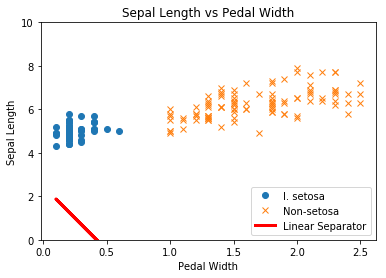

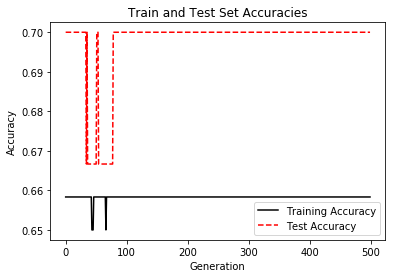

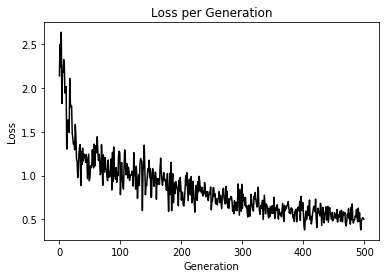

In [13]:
# Plot data and line
plt.plot(setosaX, setosaY, 'o', label='I. setosa')
plt.plot(notSetosaX, notSetosaY, 'x', label='Non-setosa')
plt.plot(x1_vals, best, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot train/test accuracies
plt.plot(trainAcc, 'k-', label='Training Accuracy')
plt.plot(testAcc, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot loss over time
plt.plot(lossVec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()